In [2]:
%ls zippedData

 Volume in drive C has no label.
 Volume Serial Number is 1658-7586

 Directory of c:\Users\DJ\OneDrive - Zero Eyes\DJ\Flatiron\phase_1\project\Microsoft_Studio_Analysis_Phase_1\zippedData

01/23/2023  07:30 PM    <DIR>          .
01/24/2023  05:54 PM    <DIR>          ..
01/23/2023  07:30 PM            53,544 bom.movie_gross.csv.gz
01/22/2023  06:53 PM    <DIR>          im.db
01/23/2023  07:30 PM        67,149,708 im.db.zip
01/23/2023  07:30 PM           498,202 rt.movie_info.tsv.gz
01/23/2023  07:30 PM         3,402,194 rt.reviews.tsv.gz
01/23/2023  07:30 PM           827,840 tmdb.movies.csv.gz
01/23/2023  07:30 PM           153,218 tn.movie_budgets.csv.gz
               6 File(s)     72,084,706 bytes
               3 Dir(s)  343,066,324,992 bytes free


In [3]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [5]:
movies = pd.read_csv('zippedData\\tmdb.movies.csv.gz')

In [6]:
movie_budgets = pd.read_csv('zippedData\\tn.movie_budgets.csv.gz')

In [7]:
print(movies.columns, movie_budgets.columns)

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object') Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [8]:
masterdf = movie_budgets.merge(movies, how='inner', left_on='movie', right_on='title', suffixes=('_budgets', '_movies'))

In [9]:
masterdf.shape

(2385, 16)

In [10]:
masterdf['movie'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2380    False
2381    False
2382    False
2383    False
2384    False
Name: movie, Length: 2385, dtype: bool

In [11]:
conn = sqlite3.connect('zippedData\im.db\im.db')

In [12]:
basics_and_ratings = pd.read_sql("""
SELECT *
FROM movie_basics
LEFT JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    """, conn )

In [13]:
new_masterdf = masterdf.merge(basics_and_ratings, how='inner', left_on='movie', right_on='primary_title', suffixes=('_master','_database')).drop_duplicates(subset='movie')

In [14]:
new_masterdf.shape

(1789, 25)

In [15]:
new_masterdf.columns

Index(['id_budgets', 'release_date_budgets', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'Unnamed: 0', 'genre_ids',
       'id_movies', 'original_language', 'original_title_master', 'popularity',
       'release_date_movies', 'title', 'vote_average', 'vote_count',
       'movie_id', 'primary_title', 'original_title_database', 'start_year',
       'runtime_minutes', 'genres', 'movie_id', 'averagerating', 'numvotes'],
      dtype='object')

In [16]:
new_masterdf.drop(['id_movies', 'Unnamed: 0', 'original_title_database', 'movie_id', 'primary_title', 'title'], axis=1, inplace=True)

In [17]:
new_masterdf.drop(['id_budgets'], axis=1, inplace=True)

In [18]:
new_masterdf.drop(['start_year', 'original_title_master'], axis=1, inplace=True)

In [19]:
new_masterdf['vote_count'].describe()

count    1789.00000
mean     1672.93907
std      2670.73022
min         1.00000
25%        79.00000
50%       620.00000
75%      2039.00000
max     22186.00000
Name: vote_count, dtype: float64

In [20]:
new_masterdf[new_masterdf['vote_count'] > 79]

,release_date_budgets,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,popularity,release_date_movies,vote_average,vote_count,runtime_minutes,genres,averagerating,numvotes
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","[28, 12, 14, 878]",en,26.52600,2009-12-18,7.40000,18676,93.00000,Horror,6.10000,43.00000
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","[12, 28, 14]",en,30.57900,2011-05-20,6.40000,8571,136.00000,"Action,Adventure,Fantasy",6.60000,447624.00000
2,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","[28, 12, 878]",en,44.38300,2015-05-01,7.30000,13457,141.00000,"Action,Adventure,Sci-Fi",7.30000,665594.00000
3,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200","[12, 28, 14]",en,80.77300,2018-04-27,8.30000,13948,149.00000,"Action,Adventure,Sci-Fi",8.50000,670926.00000
4,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209","[28, 12, 14, 878]",en,34.95300,2017-11-17,6.20000,7510,120.00000,"Action,Adventure,Fantasy",6.50000,329135.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,"May 18, 2012",Indie Game: The Movie,"$100,000",$0,$0,[99],en,6.20200,2012-05-18,7.80000,259,103.00000,"Documentary,Drama",7.70000,19538.00000
4514,"Jul 25, 2014",Happy Christmas,"$70,000","$30,312","$30,312","[35, 18]",en,5.76700,2014-06-26,5.10000,95,109.00000,None,nan,nan
4516,"Dec 31, 2011",Absentia,"$70,000",$0,"$8,555","[9648, 27, 53]",en,10.35700,2011-03-03,5.90000,175,87.00000,"Drama,Horror,Mystery",5.80000,15507.00000
4522,"Nov 12, 2010",Tiny Furniture,"$50,000","$391,674","$424,149","[10749, 35, 18]",en,6.69500,2010-11-12,5.90000,82,98.00000,"Comedy,Drama,Romance",6.20000,13397.00000


In [21]:
def remove_dollarsigncommas(data, column):
    data[column] = data[column].str.replace(',','')
    data[column] = data[column].str.replace('$','')
    return print('all done') ; print(data[column].head())

In [22]:
remove_dollarsigncommas(new_masterdf, 'production_budget')
remove_dollarsigncommas(new_masterdf, 'worldwide_gross')
remove_dollarsigncommas(new_masterdf, 'domestic_gross')

all done
all done
all done


In [23]:
new_masterdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789 entries, 0 to 4549
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_date_budgets  1789 non-null   object 
 1   movie                 1789 non-null   object 
 2   production_budget     1789 non-null   object 
 3   domestic_gross        1789 non-null   object 
 4   worldwide_gross       1789 non-null   object 
 5   genre_ids             1789 non-null   object 
 6   original_language     1789 non-null   object 
 7   popularity            1789 non-null   float64
 8   release_date_movies   1789 non-null   object 
 9   vote_average          1789 non-null   float64
 10  vote_count            1789 non-null   int64  
 11  runtime_minutes       1739 non-null   float64
 12  genres                1778 non-null   object 
 13  averagerating         1714 non-null   float64
 14  numvotes              1714 non-null   float64
dtypes: float64(5), int64(

In [24]:
new_masterdf[['production_budget', 'domestic_gross', 'worldwide_gross']] = new_masterdf[['production_budget', 'domestic_gross', 'worldwide_gross']].applymap(lambda x: int(x))

In [25]:
new_masterdf['release_month'] = new_masterdf['release_date_movies'].map(lambda x: x[5:7])

In [26]:
new_masterdf

,release_date_budgets,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,popularity,release_date_movies,vote_average,vote_count,runtime_minutes,genres,averagerating,numvotes,release_month
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,"[28, 12, 14, 878]",en,26.52600,2009-12-18,7.40000,18676,93.00000,Horror,6.10000,43.00000,12
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[12, 28, 14]",en,30.57900,2011-05-20,6.40000,8571,136.00000,"Action,Adventure,Fantasy",6.60000,447624.00000,05
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,"[28, 12, 878]",en,44.38300,2015-05-01,7.30000,13457,141.00000,"Action,Adventure,Sci-Fi",7.30000,665594.00000,05
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,"[12, 28, 14]",en,80.77300,2018-04-27,8.30000,13948,149.00000,"Action,Adventure,Sci-Fi",8.50000,670926.00000,04
4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,"[28, 12, 14, 878]",en,34.95300,2017-11-17,6.20000,7510,120.00000,"Action,Adventure,Fantasy",6.50000,329135.00000,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,"Sep 1, 2015",Exeter,25000,0,489792,"[53, 27]",en,5.93400,2015-03-26,4.70000,121,91.00000,"Horror,Mystery,Thriller",4.50000,5156.00000,03
4544,"Apr 21, 2015",Ten,25000,0,0,"[12, 27, 9648, 53]",en,1.57500,2014-03-28,5.40000,5,118.00000,Drama,5.50000,31.00000,03
4547,"Dec 31, 2014",Dry Spell,22000,0,0,"[35, 10749]",en,0.60000,2013-02-14,6.00000,1,90.00000,"Comedy,Romance",3.30000,120.00000,02
4548,"Jan 4, 2013",All Superheroes Must Die,20000,0,0,"[878, 53]",en,2.07800,2013-01-04,3.90000,19,78.00000,"Sci-Fi,Thriller",4.00000,1977.00000,01


In [27]:
tmdb_movie_genreIDs = {'genres':[{'id':28,'name':'Action'},
    {'id':12,'name':'Adventure'},
    {'id':16,'name':'Animation'},
    {'id':35,'name':'Comedy'},
    {'id':80,'name':'Crime'},
    {'id':99,'name':'Documentary'},
    {'id':18,'name':'Drama'},
    {'id':10751,'name':'Family'},
    {'id':14,'name':'Fantasy'},
    {'id':36,'name':'History'},
    {'id':27,'name':'Horror'},
    {'id':10402,'name':'Music'},
    {'id':9648,'name':'Mystery'},
    {'id':10749,'name':'Romance'},
    {'id':878,'name':'Science Fiction'},
    {'id':10770,'name':'TV Movie'},
    {'id':53,'name':'Thriller'},
    {'id':10752,'name':'War'},
    {'id':37,'name':'Western'}]}

In [28]:
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('28', 'Action')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('12', 'Adventure')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('16', 'Animation')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('35', 'Comedy')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('80', 'Crime')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('99', 'Documentary')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('18', 'Drama')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('10751', 'Family')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('14', 'Fantasy')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('36', 'History')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('27', 'Horror')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('10402', 'Music')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('9648', 'Mystery')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('10749', 'Romance')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('878', 'Science Fiction')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('10770', 'TV Movie')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('53', 'Thriller')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('10752', 'War')
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].str.replace('37', 'Western')

In [29]:
new_masterdf['genre_ids'] = new_masterdf['genre_ids'].map(lambda x: x.lstrip('[').rstrip(']').split(','))

In [30]:
new_masterdf.reset_index(inplace=True)

In [31]:
final_df = new_masterdf.join(pd.DataFrame(new_masterdf.genre_ids.values.tolist()).add_prefix('genre_'), how='left', lsuffix='_votes')
final_df.drop('index', axis=1, inplace=True)
final_df.isna().sum()/len(final_df)

release_date_budgets   0.00000
movie                  0.00000
production_budget      0.00000
domestic_gross         0.00000
worldwide_gross        0.00000
genre_ids              0.00000
original_language      0.00000
popularity             0.00000
release_date_movies    0.00000
vote_average           0.00000
vote_count             0.00000
runtime_minutes        0.02795
genres                 0.00615
averagerating          0.04192
numvotes               0.04192
release_month          0.00000
genre_0                0.00000
genre_1                0.23812
genre_2                0.55115
genre_3                0.84572
genre_4                0.96534
genre_5                0.99329
genre_6                0.99944
dtype: float64

In [32]:
final_df.drop(['genre_6','genre_5','genre_4','genre_3' ], axis=1, inplace=True)
final_df['original_language'].value_counts()

en    1719
fr      17
es       9
hi       8
zh       6
ru       4
de       3
pl       2
ja       2
ko       2
nl       1
ur       1
el       1
he       1
fa       1
da       1
lt       1
et       1
id       1
th       1
te       1
tr       1
sv       1
xx       1
ar       1
tl       1
hu       1
Name: original_language, dtype: int64

In [33]:
final_df.drop('original_language', axis=1, inplace=True)


In [34]:
final_df['domestic_gross'].describe()

count        1789.00000
mean     49076159.82560
std      81452488.68974
min             0.00000
25%       1065429.00000
50%      20497844.00000
75%      58269151.00000
max     760507625.00000
Name: domestic_gross, dtype: float64

In [35]:
final_df = final_df[final_df['domestic_gross'] > 1065429]
final_df

,release_date_budgets,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,popularity,release_date_movies,vote_average,vote_count,runtime_minutes,genres,averagerating,numvotes,release_month,genre_0,genre_1,genre_2
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,"[Action, Adventure, Fantasy, Science Fiction]",26.52600,2009-12-18,7.40000,18676,93.00000,Horror,6.10000,43.00000,12,Action,Adventure,Fantasy
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[Adventure, Action, Fantasy]",30.57900,2011-05-20,6.40000,8571,136.00000,"Action,Adventure,Fantasy",6.60000,447624.00000,05,Adventure,Action,Fantasy
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,"[Action, Adventure, Science Fiction]",44.38300,2015-05-01,7.30000,13457,141.00000,"Action,Adventure,Sci-Fi",7.30000,665594.00000,05,Action,Adventure,Science Fiction
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,"[Adventure, Action, Fantasy]",80.77300,2018-04-27,8.30000,13948,149.00000,"Action,Adventure,Sci-Fi",8.50000,670926.00000,04,Adventure,Action,Fantasy
4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,"[Action, Adventure, Fantasy, Science Fiction]",34.95300,2017-11-17,6.20000,7510,120.00000,"Action,Adventure,Fantasy",6.50000,329135.00000,11,Action,Adventure,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,"Jun 19, 2015",The Overnight,200000,1109808,1165996,"[Mystery, Comedy]",6.57600,2015-06-19,6.00000,200,88.00000,None,7.50000,24.00000,06,Mystery,Comedy,None
1745,"Jul 22, 2011",Another Earth,175000,1321194,2102779,"[Drama, Science Fiction]",10.03000,2011-07-22,6.70000,853,92.00000,"Drama,Romance,Sci-Fi",7.00000,85839.00000,07,Drama,Science Fiction,None
1752,"Jun 15, 2012",Your Sister's Sister,120000,1597486,3090593,"[Drama, Comedy]",7.11500,2012-06-14,6.60000,192,90.00000,"Comedy,Drama",6.70000,24780.00000,06,Drama,Comedy,None
1753,"Jul 10, 2015",The Gallows,100000,22764410,41656474,"[Horror, Thriller]",9.16600,2015-07-10,4.80000,591,81.00000,"Horror,Mystery,Thriller",4.20000,17763.00000,07,Horror,Thriller,None


In [36]:
final_df.drop('genres', axis=1, inplace=True)

In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1754
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_date_budgets  1341 non-null   object 
 1   movie                 1341 non-null   object 
 2   production_budget     1341 non-null   int64  
 3   domestic_gross        1341 non-null   int64  
 4   worldwide_gross       1341 non-null   int64  
 5   genre_ids             1341 non-null   object 
 6   popularity            1341 non-null   float64
 7   release_date_movies   1341 non-null   object 
 8   vote_average          1341 non-null   float64
 9   vote_count            1341 non-null   int64  
 10  runtime_minutes       1306 non-null   float64
 11  averagerating         1289 non-null   float64
 12  numvotes              1289 non-null   float64
 13  release_month         1341 non-null   object 
 14  genre_0               1341 non-null   object 
 15  genre_1              

In [46]:
type(((final_df.groupby('release_month').mean()['worldwide_gross'] - final_df.groupby('release_month').mean()['production_budget']).values.tolist())[0])

float

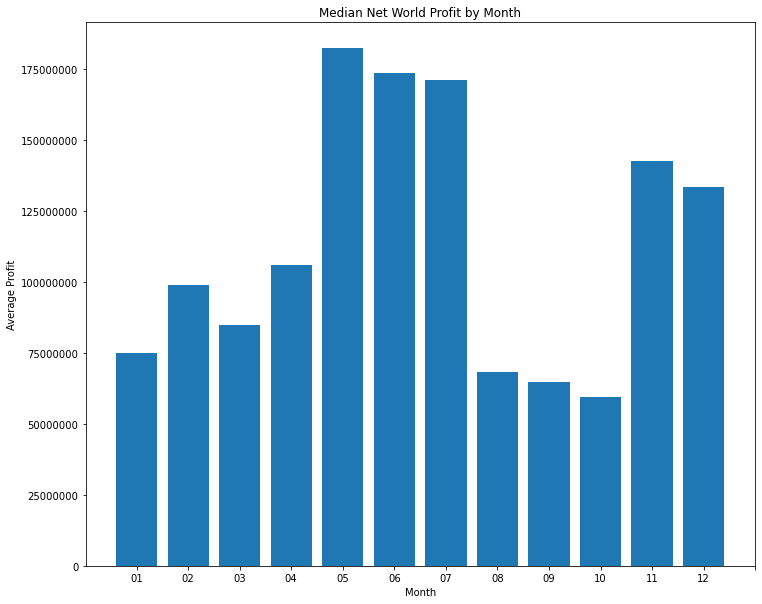

In [47]:
final_df['worldwide_gross'] - final_df['production_budget']
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Median Net World Profit by Month')
ax.bar(
     (final_df.groupby('release_month').mean()['worldwide_gross'] - final_df.groupby('release_month').mean()['production_budget']).index.tolist()
     ,
    ((final_df.groupby('release_month').mean()['worldwide_gross'] - final_df.groupby('release_month').mean()['production_budget']).values.tolist()))

ax.set_ylabel('Average Profit')
ax.set_xlabel('Month')
ax.set_xticks(range(13))
ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [49]:
((final_df.groupby('release_month').mean()['worldwide_gross']/final_df.groupby('release_month').mean()['production_budget']).values.tolist())

[3.0539417875620827,
 3.24198891207646,
 2.577066606585036,
 3.8495984430792376,
 3.2865246319838732,
 3.7263012736551047,
 3.5709196700868606,
 2.6650654129728784,
 2.744782924063009,
 2.8386413788673592,
 3.333627024111675,
 3.4716906274976846]

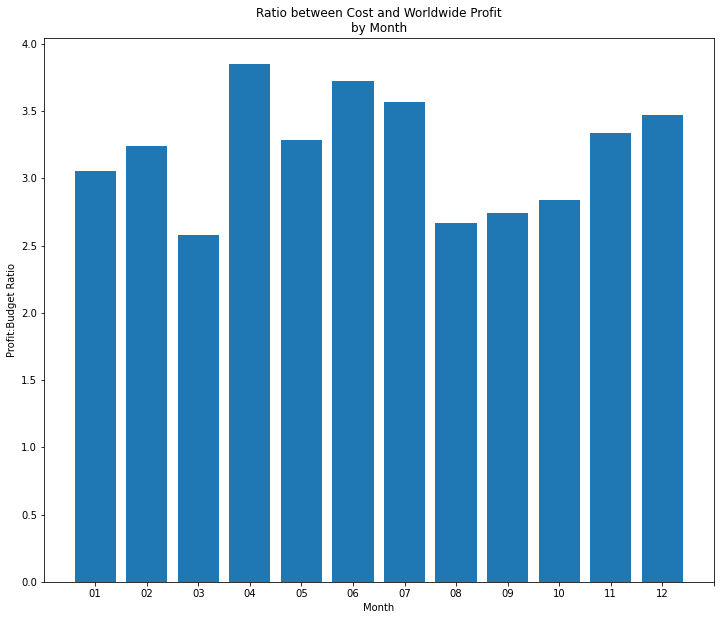

In [51]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Ratio between Cost and Worldwide Profit\nby Month')
ax.bar(
     
     ((final_df.groupby('release_month').mean()['worldwide_gross']/final_df.groupby('release_month').mean()['production_budget']).index.tolist()),
     ((final_df.groupby('release_month').mean()['worldwide_gross']/final_df.groupby('release_month').mean()['production_budget']).values.tolist()))

ax.set_ylabel('Profit:Budget Ratio')
ax.set_xlabel('Month')
ax.set_xticks(range(13))
plt.show()

In [74]:
sortgenres = final_df.groupby('genre_0').mean()
sortgenres

,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,runtime_minutes,averagerating,numvotes
genre_0,,,,,,,,,
,33680555.55556,33575113.66667,59689841.05556,0.62972,5.98889,1.61111,87.25000,5.88333,13296.16667
Action,89901660.15625,104249344.48047,291213125.12500,16.88186,6.23359,3629.17188,112.47619,6.38600,201969.27600
Adventure,113538750.00000,122444950.02500,353204092.06250,18.81653,6.41500,4056.07500,111.73750,6.51667,193649.46154
Animation,91714285.71429,121912634.02041,343892169.75510,14.45047,6.64694,2653.85714,94.53191,6.71489,120144.74468
Comedy,28672222.22222,47016442.74486,87265313.99177,10.13087,6.20247,1195.48971,102.40664,6.18755,83330.00858
Crime,34392156.86275,40860806.11765,89152549.29412,14.61653,6.56471,2167.68627,113.44000,6.67600,147930.28000
Documentary,29208333.33333,41738422.70833,87158770.16667,3.15342,6.69583,59.33333,90.39130,6.77391,18551.43478
Drama,25720996.89441,37018063.06832,77286220.07143,10.16984,6.68354,1530.69565,111.62300,6.71851,102733.30195
Family,56305263.15789,113090691.68421,301816252.84211,12.14084,6.45263,2265.05263,97.38889,6.36111,70700.72222


Text(0.5, 0, 'Genre')

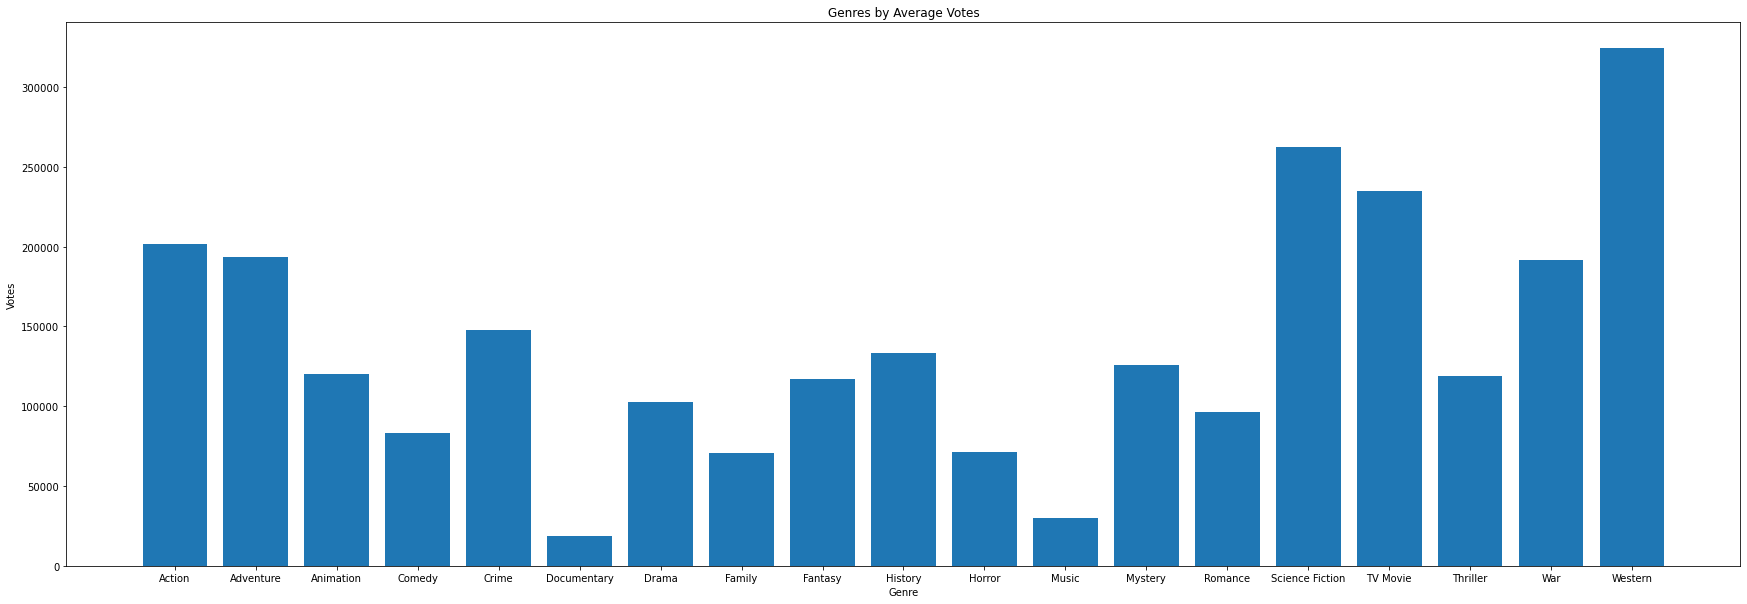

In [80]:
fig, ax = plt.subplots(figsize= (30, 10))
ax.set_title('Genres by Average Votes')
ax.bar( sortgenres.iloc[1:].index, sortgenres['numvotes'].iloc[1:])
ax.set_ylabel('Votes')
ax.set_xlabel('Genre')

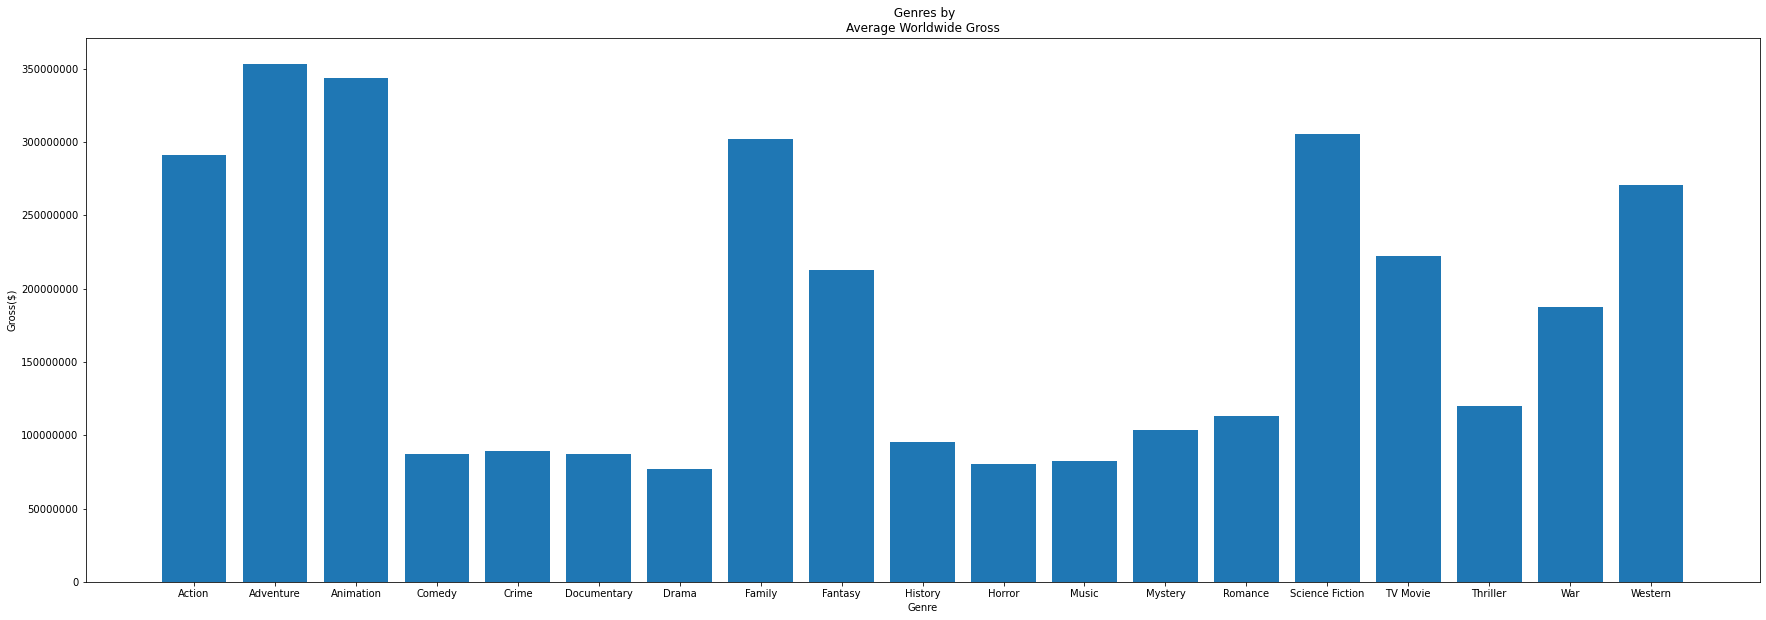

In [90]:
fig, ax = plt.subplots(figsize= (30, 10))
ax.set_title(' Genres by\nAverage Worldwide Gross')
ax.bar( sortgenres.iloc[1:].index, sortgenres['worldwide_gross'].iloc[1:])
ax.set_ylabel('Gross($)')
ax.set_xlabel('Genre')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [83]:
(sortgenres['worldwide_gross'] -sortgenres['production_budget'])[1:]

genre_0
Action            201311464.96875
Adventure         239665342.06250
Animation         252177884.04082
Comedy             58593091.76955
Crime              54760392.43137
Documentary        57950436.83333
Drama              51565223.17702
Family            245510989.68421
Fantasy           130252942.60000
History            71227633.00000
Horror             62849557.68675
Music              51519466.33333
Mystery            71837153.92857
Romance            84902143.73333
Science Fiction   222116287.86667
TV Movie          172383055.00000
Thriller           82951727.66176
War               119321465.66667
Western           195077936.50000
dtype: float64

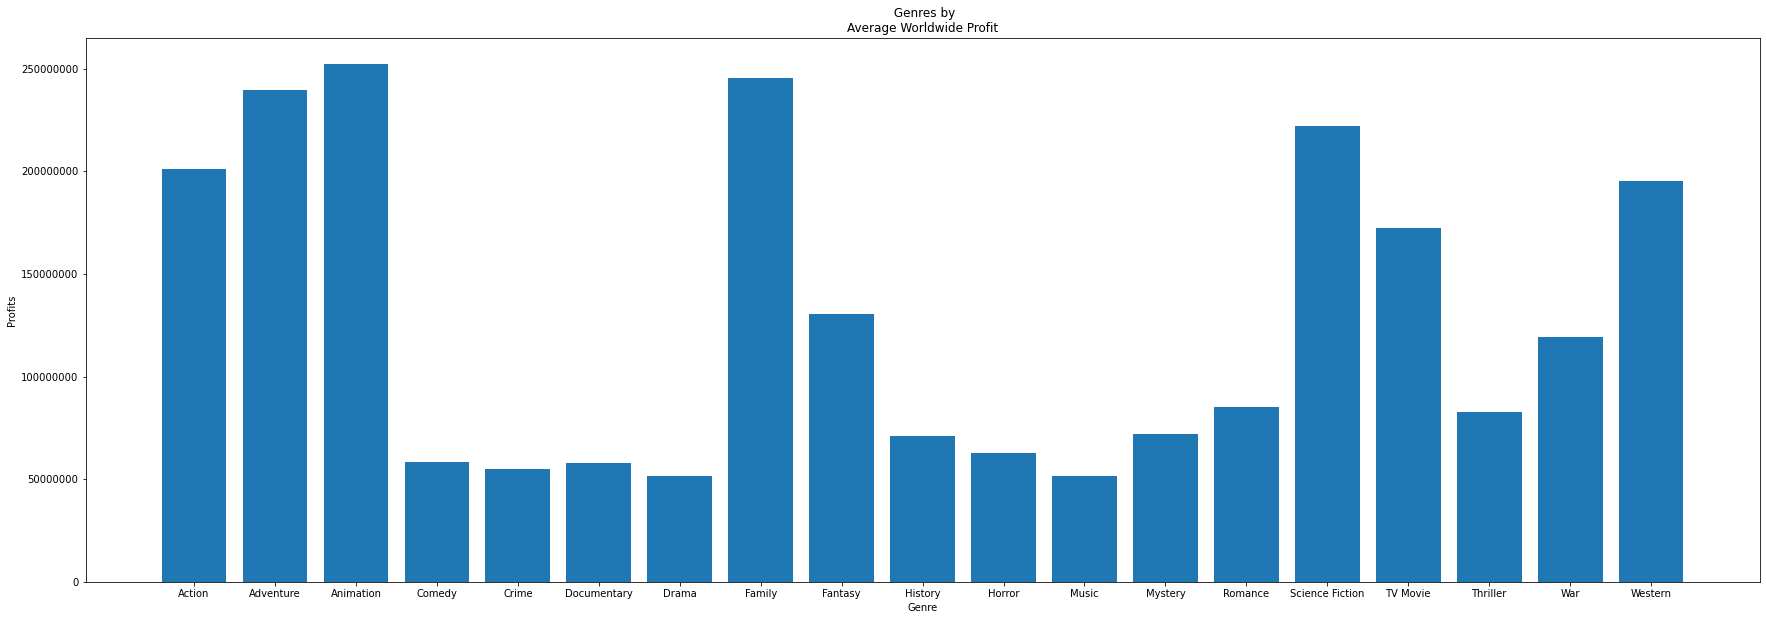

In [92]:
fig, ax = plt.subplots(figsize= (30, 10))
ax.set_title(' Genres by\nAverage Worldwide Profit')
ax.bar( sortgenres.iloc[1:].index, (sortgenres['worldwide_gross'] -sortgenres['production_budget'])[1:])
ax.set_ylabel('Profits')
ax.set_xlabel('Genre')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

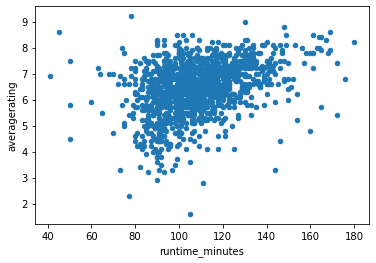

In [86]:
final_df.plot.scatter('runtime_minutes', 'averagerating')

<AxesSubplot:xlabel='runtime_minutes', ylabel='numvotes'>

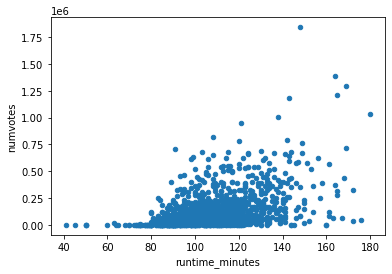

In [87]:
final_df.plot.scatter('runtime_minutes', 'numvotes')

<ipython-input-98-38ac25302a9d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.axes.set_xticklabels(genreinfo)


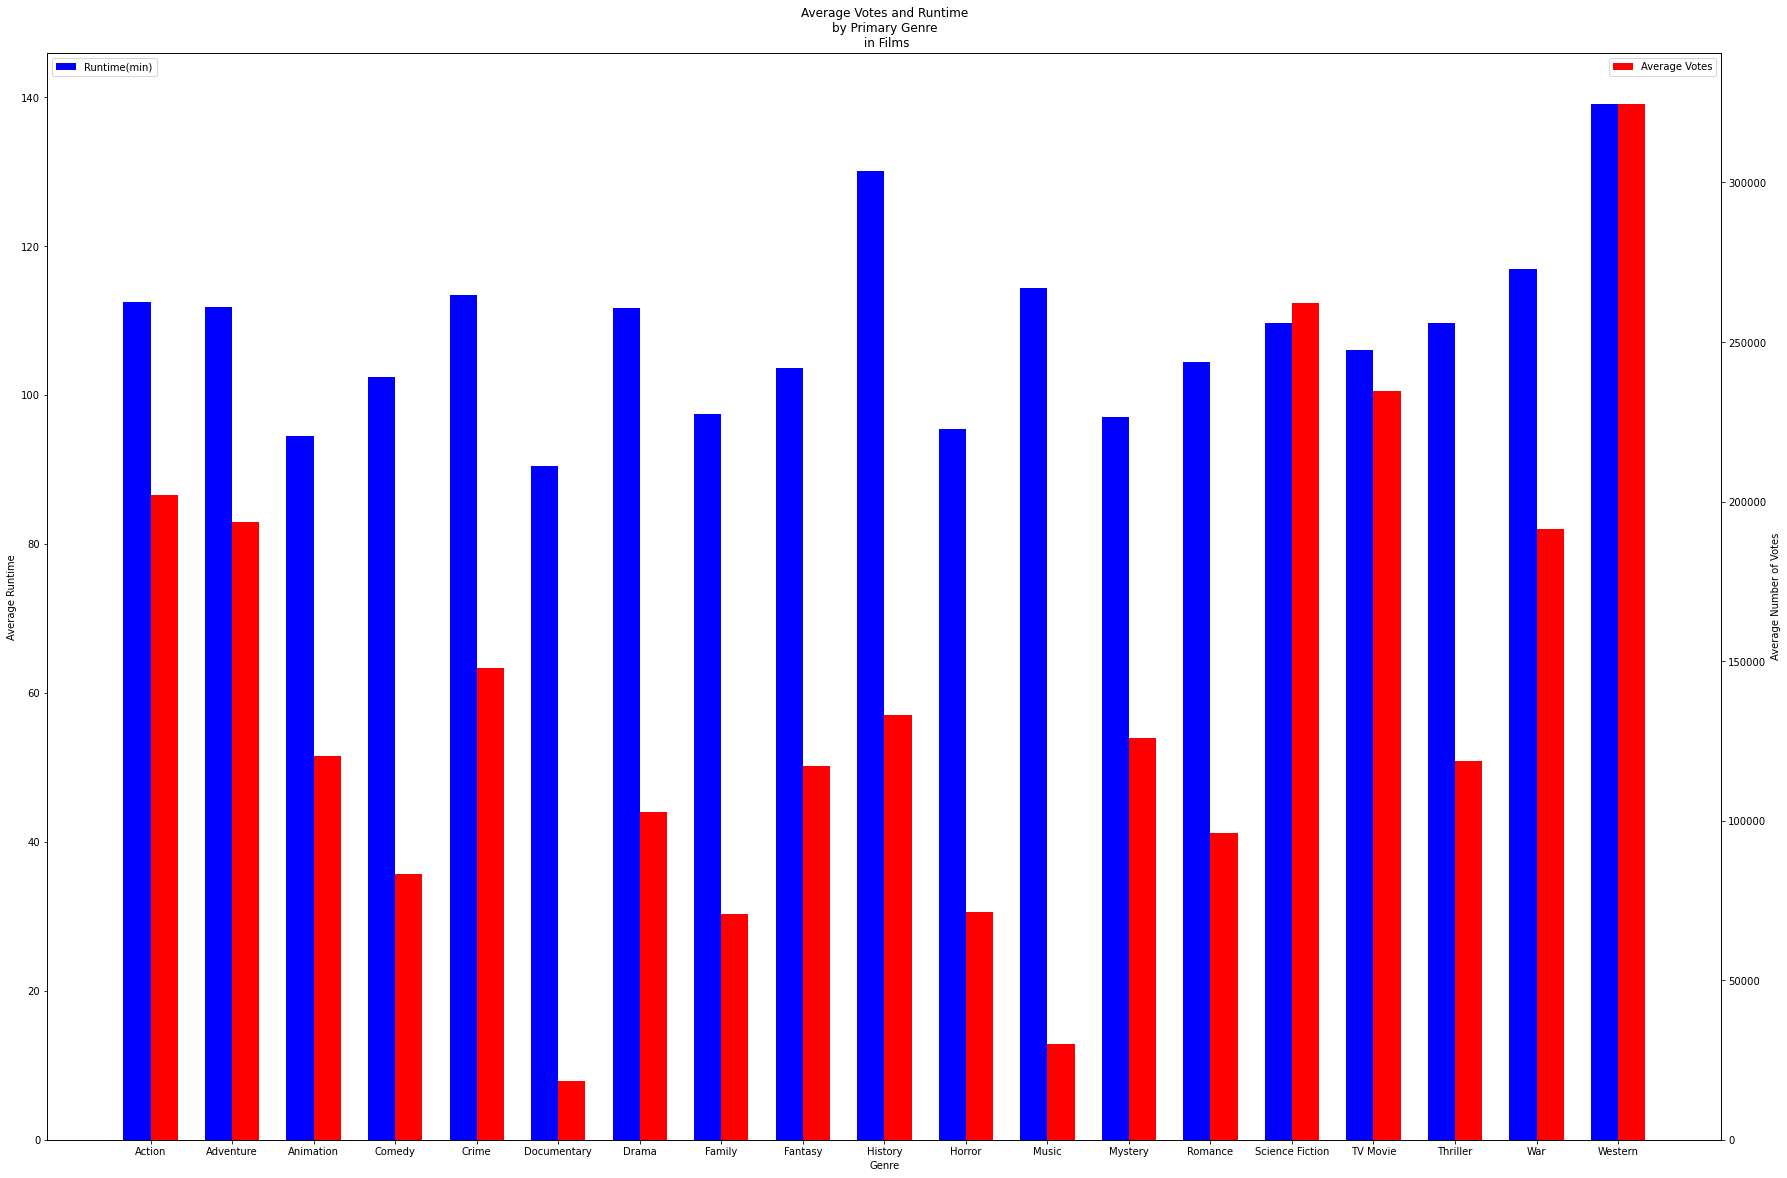

In [98]:
runtimeinfo = sortgenres['runtime_minutes'][1:]
numvoteinfo = sortgenres['numvotes'][1:]
indices = range(len(sortgenres[1:]))
genreinfo = sortgenres[1:].index
# Calculate optimal width
width = np.min(np.diff(indices))/3.

fig, ax1 = plt.subplots(figsize=(30,20))
ax1.bar(indices-width/2.,runtimeinfo,width,color='b', label='Runtime(min)')
ax2 = ax1.twinx()
ax2.bar(indices+width/2.,numvoteinfo,width,color='r', label='Average Votes')
# tiks = ax.get_xticks()
ax1.axes.set_xticklabels(genreinfo)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Runtime')
ax2.set_ylabel('Average Number of Votes')
ax1.set_xticks(indices)
ax1.set_title('Average Votes and Runtime\nby Primary Genre\n in Films')
ax1.legend(loc=2)
ax2.legend(loc=0)
plt.show()

<ipython-input-99-ce1987628918>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.axes.set_xticklabels(genreinfo)


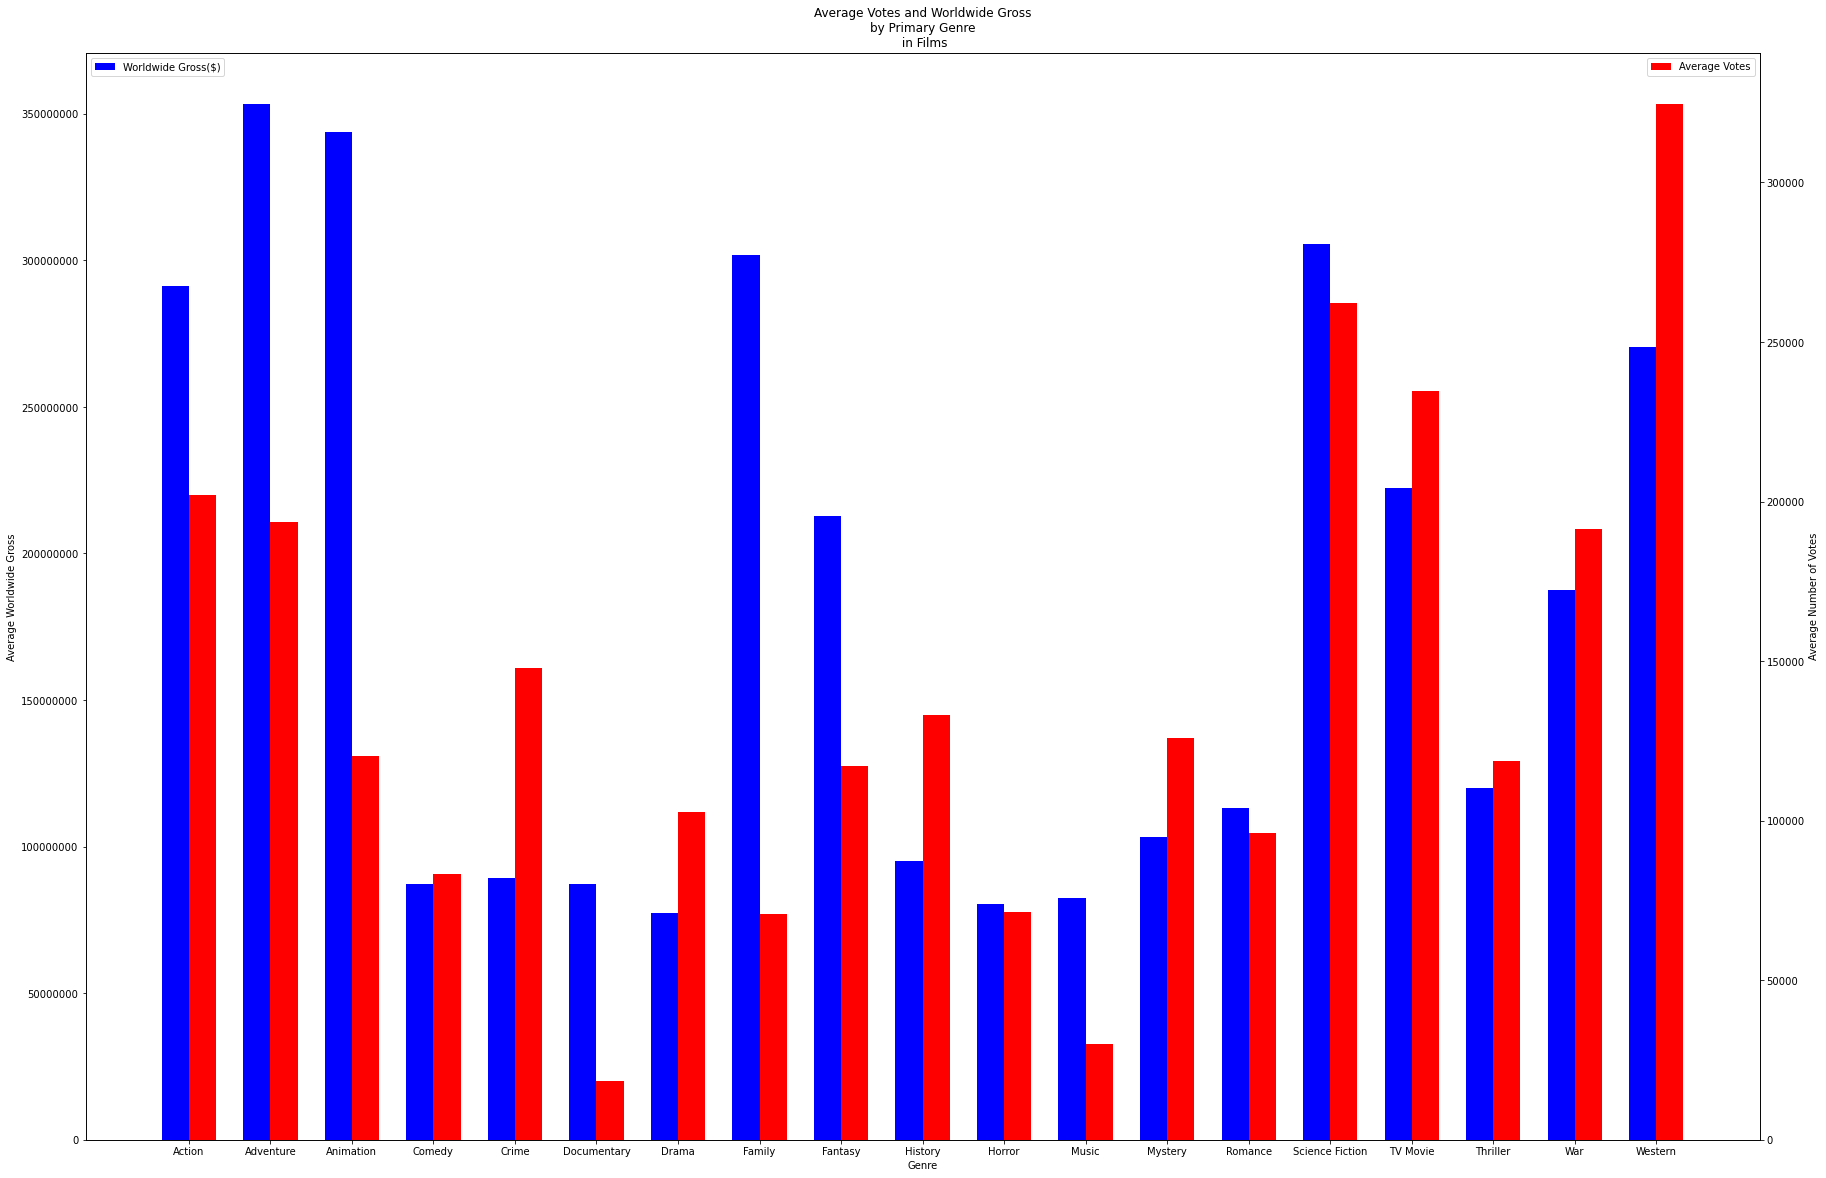

In [99]:
runtimeinfo = sortgenres['worldwide_gross'][1:]
numvoteinfo = sortgenres['numvotes'][1:]
indices = range(len(sortgenres[1:]))
genreinfo = sortgenres[1:].index
# Calculate optimal width
width = np.min(np.diff(indices))/3.

fig, ax1 = plt.subplots(figsize=(30,20))
ax1.bar(indices-width/2.,runtimeinfo,width,color='b', label='Worldwide Gross($)')
ax2 = ax1.twinx()
ax2.bar(indices+width/2.,numvoteinfo,width,color='r', label='Average Votes')
# tiks = ax.get_xticks()
ax1.axes.set_xticklabels(genreinfo)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Worldwide Gross')
ax2.set_ylabel('Average Number of Votes')
ax1.set_xticks(indices)
ax1.set_title('Average Votes and Worldwide Gross\nby Primary Genre\n in Films')
ax1.legend(loc=2)
ax2.legend(loc=0)
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')
plt.show()

<ipython-input-101-ce1987628918>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.axes.set_xticklabels(genreinfo)


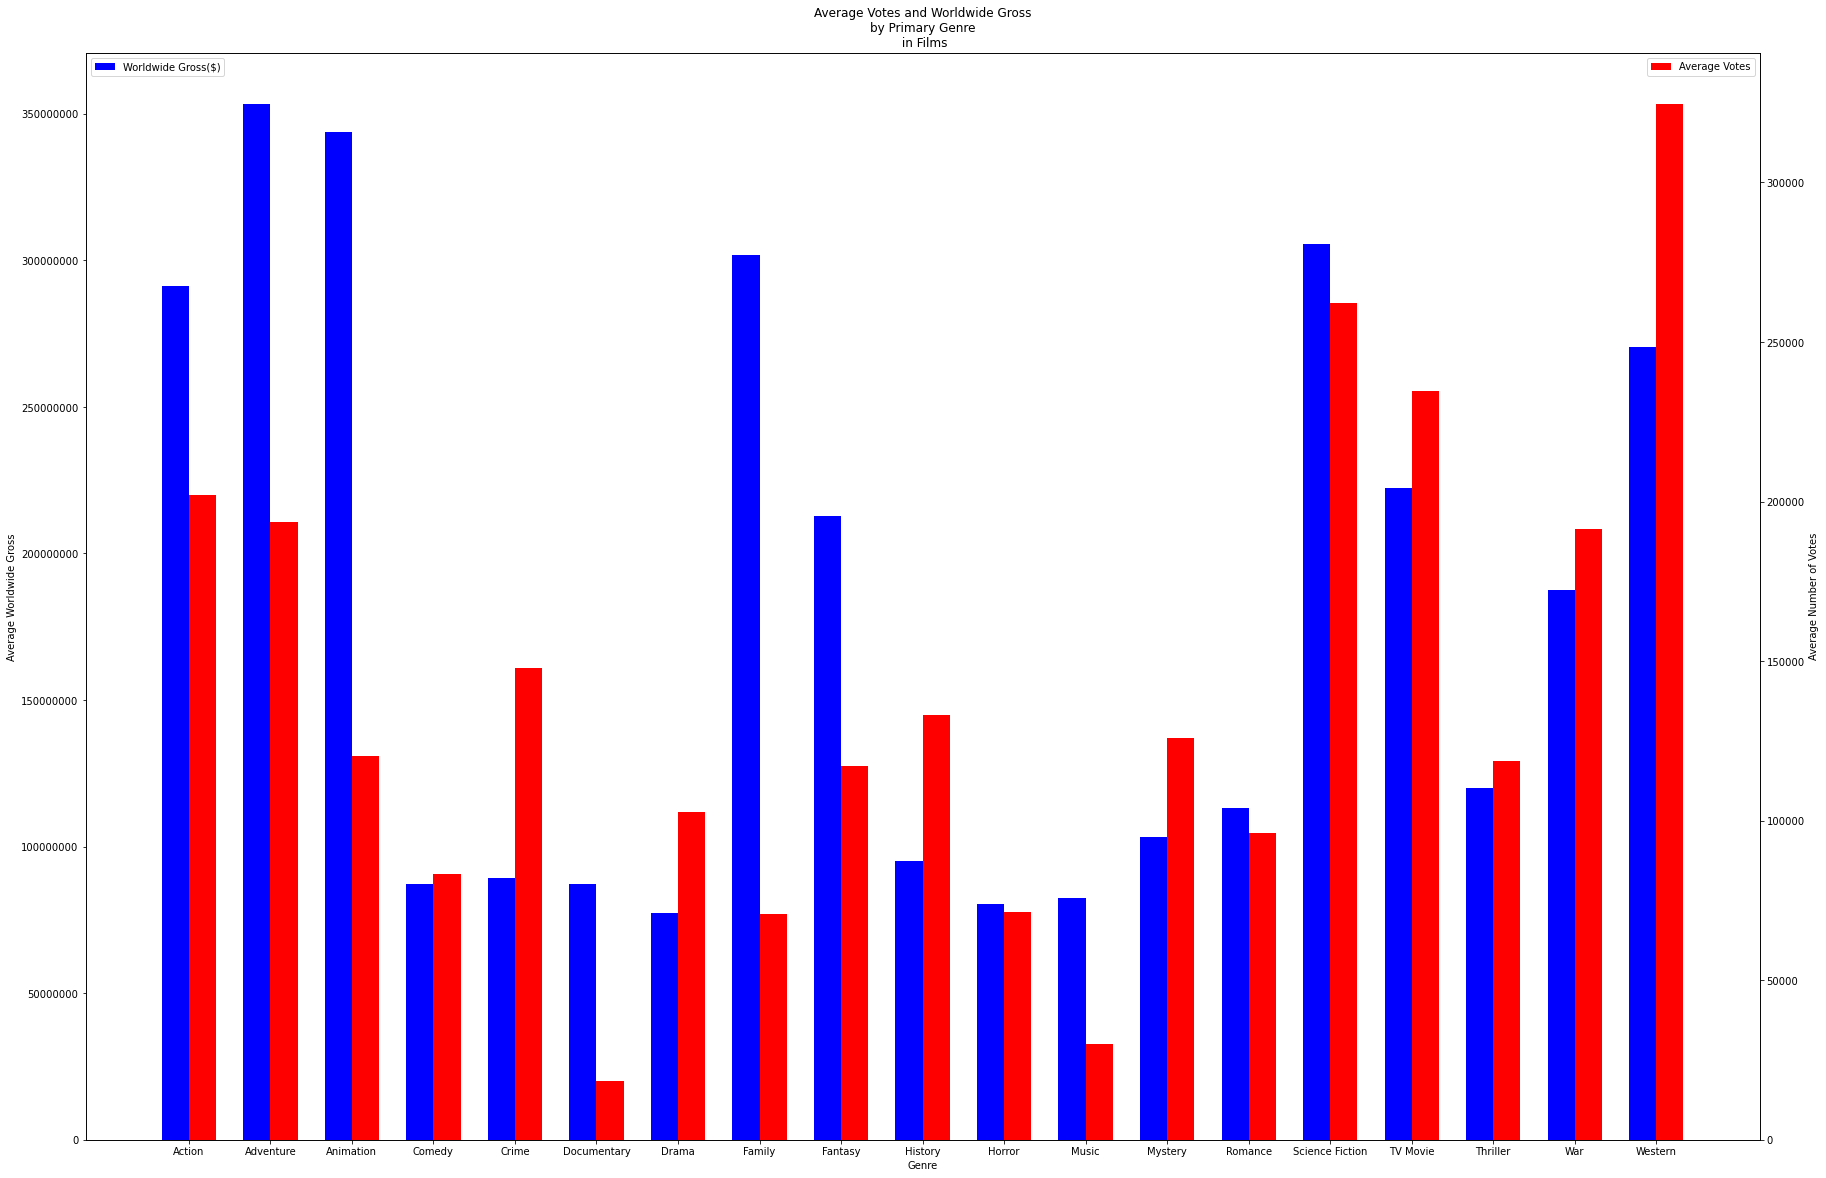

In [101]:
runtimeinfo = sortgenres['worldwide_gross'][1:]
numvoteinfo = sortgenres['numvotes'][1:]
indices = range(len(sortgenres[1:]))
genreinfo = sortgenres[1:].index
# Calculate optimal width
width = np.min(np.diff(indices))/3.

fig, ax1 = plt.subplots(figsize=(30,20))
ax1.bar(indices-width/2.,runtimeinfo,width,color='b', label='Worldwide Gross($)')
ax2 = ax1.twinx()
ax2.bar(indices+width/2.,numvoteinfo,width,color='r', label='Average Votes')
# tiks = ax.get_xticks()
ax1.axes.set_xticklabels(genreinfo)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Worldwide Gross')
ax2.set_ylabel('Average Number of Votes')
ax1.set_xticks(indices)
ax1.set_title('Average Votes and Worldwide Gross\nby Primary Genre\n in Films')
ax1.legend(loc=2)
ax2.legend(loc=0)
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')
plt.show()